In [ ]:
#run every time
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#run once
#download your kaggle config file from account and upload it to drive with following command.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaibhavmehra","key":"32e0f9898fc2252f996184fff1d09d54"}'}

In [ ]:
#run once
#install kaggle and synchronize it with your account with the help of config file
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
#run once
#download any kaggle database to any location in google drive
#here download "Insurance_Churn_ParticipantsData" database at "/content/gdrive/My\Drive/kaggle/Churn_detection"
!kaggle competitions download -c Insurance_Churn_ParticipantsData -p /content/gdrive/My\Drive/kaggle/Churn_detection

404 - Not Found


In [ ]:
#run everytime
#changing the main directory of colab file 
import os
os.chdir('/content/drive/MyDrive/kaggle/Churn_detection')

In [ ]:
#run once
#unzipping the data into the newly created data folder
!mkdir data
!unzip -q archive.zip -d data/

In [ ]:
#run everytime
#download correct version of xgboost from here "https://drive.google.com/file/d/1vyHsOalOLz7bNl2fvSvUKqgnBjivuHe4/view?usp=sharing"
#following command will update the xgboost version to bring it in runnable state
!pip uninstall xgboost
!pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

     |████████████████████████████████| 166.7MB 86kB/s 


In [ ]:
#run everytime
#importing all the dependencies

!pip install shap

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob
import gc

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import shap

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['axes.titlesize'] = 16


from time import time, strftime, gmtime
start = time()
import datetime
print(str(datetime.datetime.now()))

     |████████████████████████████████| 358kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=d1aa5574488ba290853752df0d292442c80b6b24ef6590423232c6a723b70b4f
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


2021-06-12 04:33:56.817589


In [ ]:
#run everytime
#importing training dataset
train = pd.read_csv('data/Train.csv')
print(f'Number of rows in trainset: {train.shape[0]} \nNumber of columns in trainset: {train.shape[1]}')
train.head()

Number of rows in trainset: 33908 
Number of columns in trainset: 17


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [ ]:
#run everytime 
#importing testing dataset
test = pd.read_csv('data/Test.csv')
print(f'Number of rows in testset: {test.shape[0]} \nNumber of columns in testset: {test.shape[1]}')
test.head()

Number of rows in testset: 11303 
Number of columns in testset: 16


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [ ]:
#run everytime
#installing openpyxl

!pip install -q openpyxl

In [ ]:
#run everytime
#importing submission files

sub = pd.read_excel('data/sample_submission.xlsx')
sub.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [ ]:
#run once

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [ ]:
#run once
train.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,33908.0,-0.004158,0.999776,-2.159994,-0.747384,-0.182341,0.665225,5.091402
feature_1,33908.0,0.002584,1.014268,-3.081149,-0.422787,-0.297324,0.022901,33.094776
feature_2,33908.0,-0.000213,1.000872,-1.779108,-0.938003,0.023260,0.624050,1.825628
feature_3,33908.0,-0.000053,1.002512,-1.002478,-0.602517,-0.303517,0.236237,18.094700
feature_4,33908.0,-0.000298,1.003724,-0.569351,-0.569351,-0.246560,0.076230,19.443647
feature_5,33908.0,-0.004652,0.993984,-0.411453,-0.411453,-0.411453,-0.411453,8.127648
feature_6,33908.0,-0.007498,0.802696,-0.251940,-0.251940,-0.251940,-0.251940,23.625644
feature_7,33908.0,4.336381,3.273376,0.000000,1.000000,4.000000,7.000000,11.000000
feature_8,33908.0,1.171051,0.606730,0.000000,1.000000,1.000000,2.000000,2.000000
feature_9,33908.0,1.225345,0.749104,0.000000,1.000000,1.000000,2.000000,3.000000


In [ ]:
#run once
#checking the null or NA values in every column

train.isna().sum(), test.isna().sum()

(feature_0     0
 feature_1     0
 feature_2     0
 feature_3     0
 feature_4     0
 feature_5     0
 feature_6     0
 feature_7     0
 feature_8     0
 feature_9     0
 feature_10    0
 feature_11    0
 feature_12    0
 feature_13    0
 feature_14    0
 feature_15    0
 labels        0
 dtype: int64, feature_0     0
 feature_1     0
 feature_2     0
 feature_3     0
 feature_4     0
 feature_5     0
 feature_6     0
 feature_7     0
 feature_8     0
 feature_9     0
 feature_10    0
 feature_11    0
 feature_12    0
 feature_13    0
 feature_14    0
 feature_15    0
 dtype: int64)

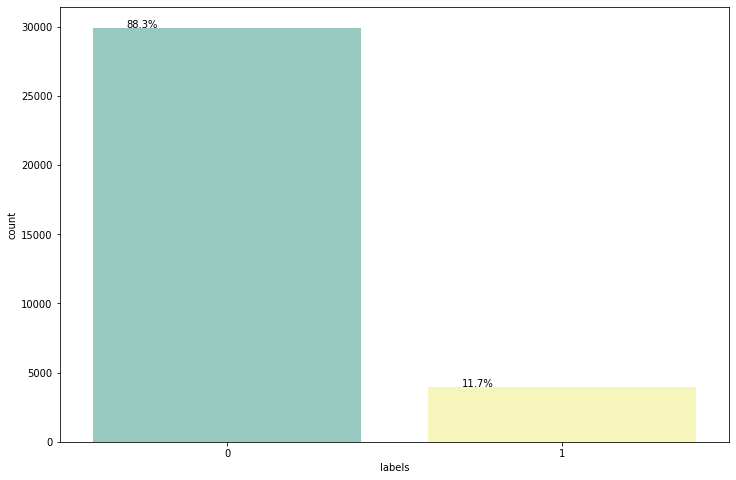

In [ ]:
#run once
#getting how many results give value 1 or 0

ax = sns.countplot(data = train, x = 'labels', palette = 'Set3')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height() / len(train)), (p.get_x() + 0.1, p.get_height() + 5))

In [ ]:
#run once
#getting list of features

features = list(train.columns)
features.remove('labels')
features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15']

In [ ]:
#run once
#getting list of numerical features

numerical_features = [c for c in train.columns if train[c].dtype == 'float64']
numerical_features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6']

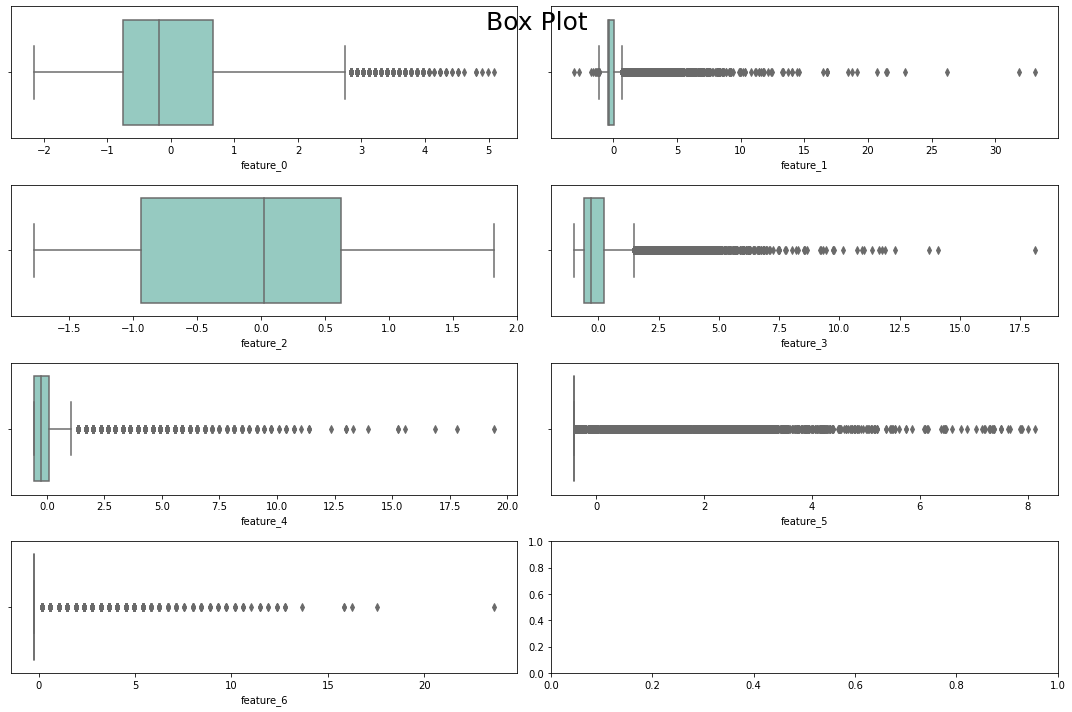

In [ ]:
#run once
#box plotting for each numerical feature

fig, ax = plt.subplots(4, 2, figsize = (15, 10))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x = train[c], ax = ax[i], palette = 'Set3')
plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

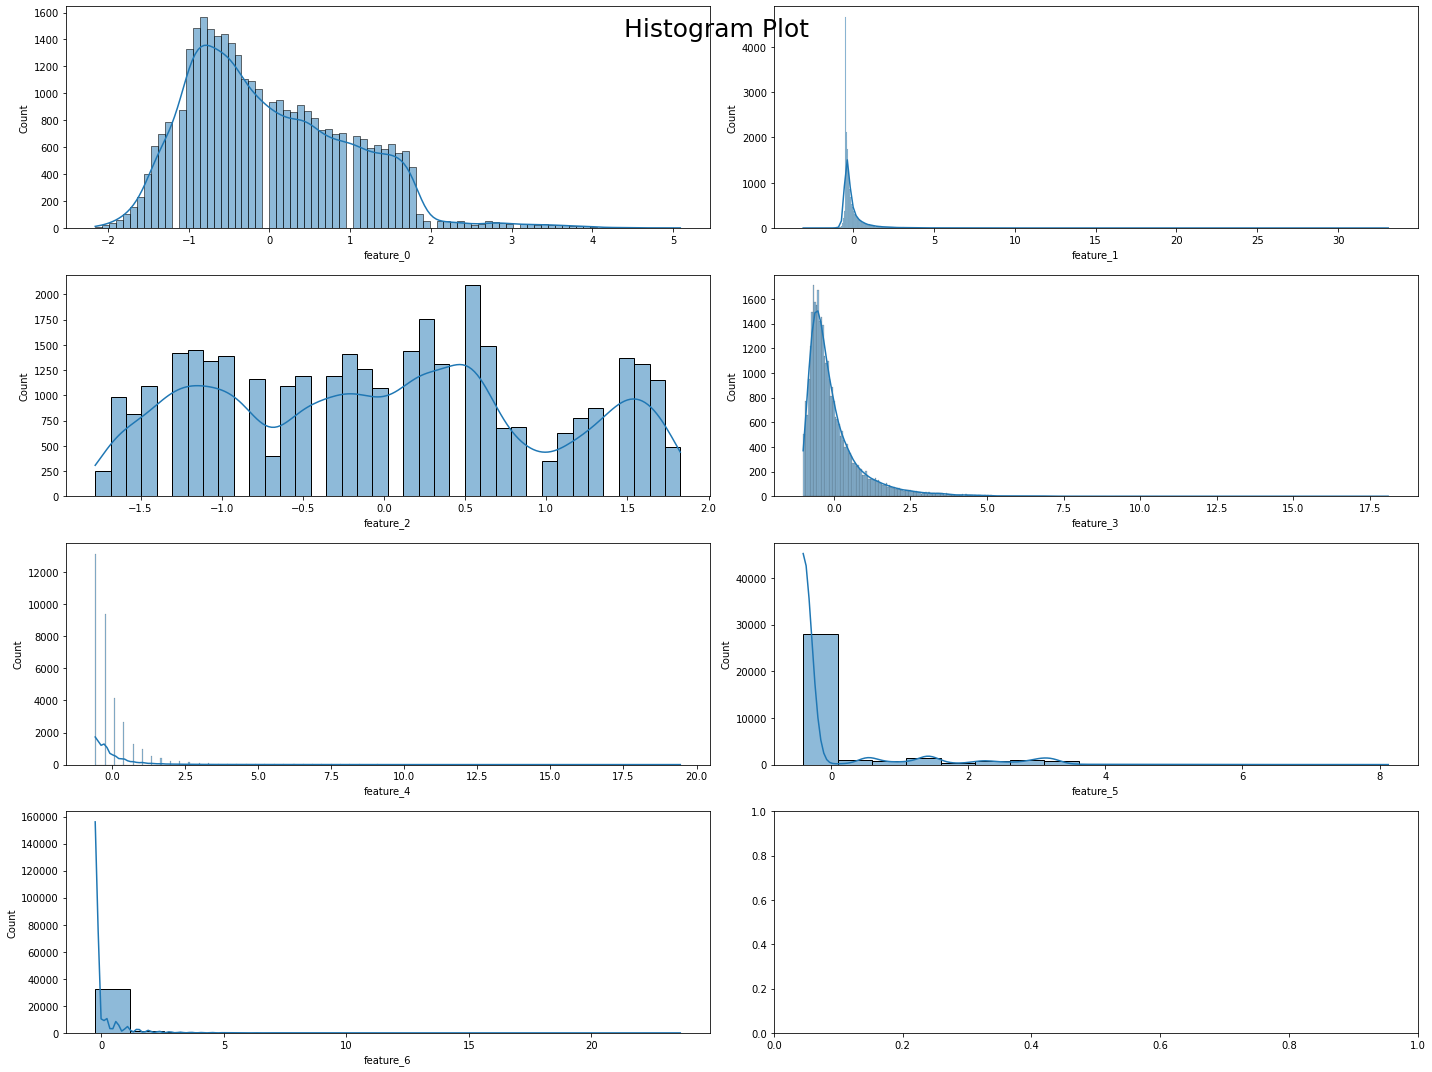

In [ ]:
#run once
#histograms for each numerical feature

fig, ax = plt.subplots(4, 2, figsize = (20, 15))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.histplot(x = train[c], ax = ax[i], kde = True)
plt.suptitle('Histogram Plot', fontsize = 25)
fig.tight_layout()

In [ ]:
int64_cols = [c for c in train.columns if train[c].dtype == 'int64']
print(f'There are {len(int64_cols)} features with int64 dtype: \n{int64_cols}')

#Check their unique values

print('Unique number of values in int64 features:')
for c in int64_cols:
    if c != 'labels':
        print(f'{c.upper()}: {train[c].nunique()}, {test[c].nunique()}')

There are 10 features with int64 dtype: 
['feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'labels']
Unique number of values in int64 features:
FEATURE_7: 12, 12
FEATURE_8: 3, 3
FEATURE_9: 4, 4
FEATURE_10: 2, 2
FEATURE_11: 2, 2
FEATURE_12: 2, 2
FEATURE_13: 3, 3
FEATURE_14: 12, 12
FEATURE_15: 4, 4


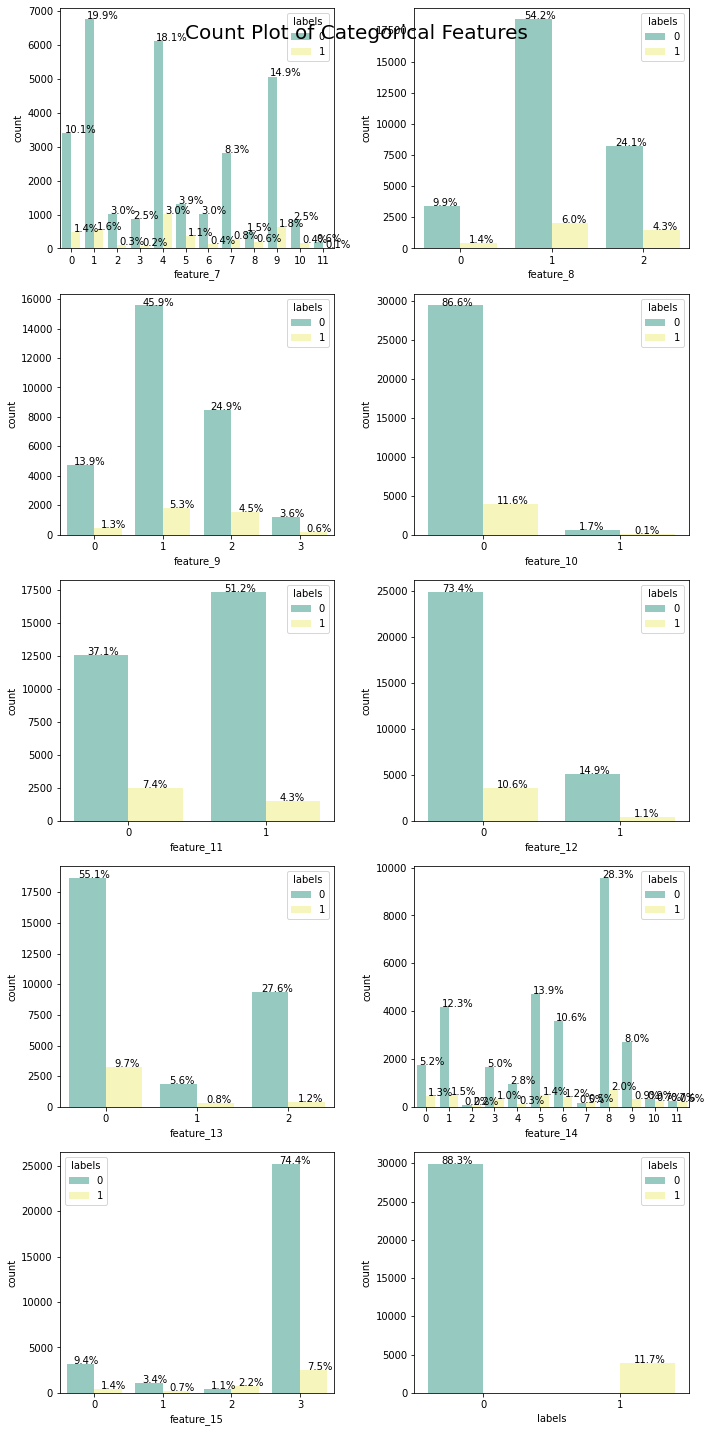

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()
for i, c in enumerate(int64_cols):
    a = sns.countplot(x = train[c], ax = ax[i], palette = 'Set3', hue = train['labels'])
    for p in a.patches:
        a.annotate('{:.1f}%'.format(100 * p.get_height() / len(train)), (p.get_x() + 0.1, p.get_height() + 5))
plt.suptitle('Count Plot of Categorical Features', fontsize = 20)
fig.tight_layout()

In [ ]:
scl = StandardScaler()
train[numerical_features] = scl.fit_transform(train[numerical_features])
test[numerical_features] = scl.transform(test[numerical_features])

In [ ]:
int64_cols.remove('labels')
for c in int64_cols: 
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].astype(str).values) + list(test[c].astype(str).values)) #Takes care of cardinality mismatch
    train[c] = lbl.transform(list(train[c].astype(str).values))
    test[c] = lbl.transform(list(test[c].astype(str).values))

In [ ]:
X = train.drop('labels', axis = 1)
y = train['labels']

sfs = SFS(LogisticRegression(class_weight = 'balanced'),
           k_features = 10,
           forward = True,
           floating = False,
           scoring = 'f1',
           cv = 2)

sfs.fit(X,y)

print(f'Top 10 features selected using Forward Propagation: \n{sfs.k_feature_names_}')
print(f'Score: {sfs.k_score_}')

selected_features = list(sfs.k_feature_names_)

Top 10 features selected using Forward Propagation: 
('feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13')
Score: 0.4860672468776544


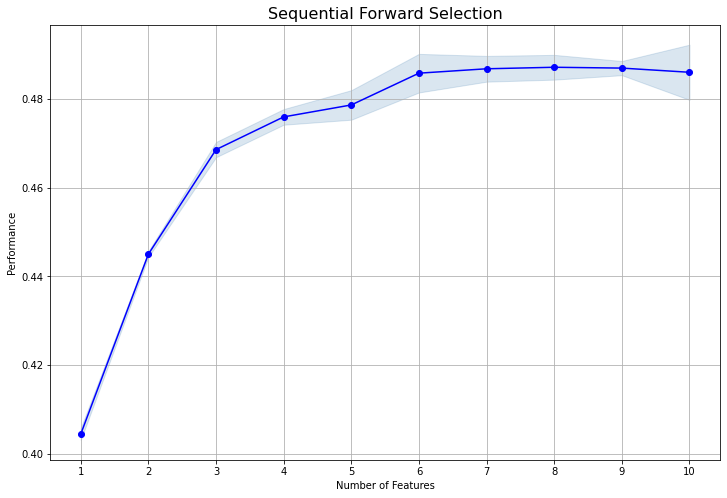

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
train_df, valid_df = train_test_split(train, test_size = 0.2, random_state = 2021, stratify = train['labels'])

Xtrain = train_df[selected_features]
ytrain = train_df['labels']
Xvalid = valid_df[selected_features]
yvalid = valid_df['labels']
print(Xtrain.shape, ytrain.shape, Xvalid.shape, yvalid.shape)

(27126, 10) (27126,) (6782, 10) (6782,)


In [ ]:
num_pos_samples = train['labels'].value_counts().values[1]
total_samples = len(train['labels'])
scale_pos_weight = 100 - ( (num_pos_samples / total_samples) * 100 )
scale_pos_weight

88.30069600094373

In [ ]:
import lightgbm as lgbm

params = {'num_leaves': 7,  # 2^max_depth - 1
          'min_child_samples': 100,
          'objective': 'binary',
          #'scale_pos_weight': scale_pos_weight, #99,
          'is_unbalance': 'true',
          'max_depth': 3,
          'learning_rate': 0.01,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.7,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'seed': 2021
         }

In [ ]:
print(f'Training LightGBM..')
ltrain = lgbm.Dataset(Xtrain, label = ytrain)
lvalid = lgbm.Dataset(Xvalid, label = yvalid)

num_rounds = 10000
clf = lgbm.train(params, ltrain, num_rounds, valid_sets = [ltrain, lvalid], verbose_eval = 50, 
                    early_stopping_rounds = 100)

train_preds = clf.predict(Xtrain, num_iteration = clf.best_iteration)
print(f'Training ROC_AUC_SCORE: {roc_auc_score((train_preds > 0.5), ytrain)}')
print(f'Training F1 SCORE: {f1_score((train_preds > 0.5), ytrain)}')

valid_preds = clf.predict(Xvalid, num_iteration = clf.best_iteration)
print(f'Validation ROC_AUC_SCORE: {roc_auc_score((valid_preds > 0.5), yvalid)}')
print(f'Validation F1 SCORE: {f1_score((valid_preds > 0.5), yvalid)}')

test_preds = clf.predict(test[selected_features], num_iteration = clf.best_iteration)
print(test_preds[:10])

Training LightGBM..
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.873396	valid_1's auc: 0.866442
[100]	training's auc: 0.878927	valid_1's auc: 0.870866
[150]	training's auc: 0.882593	valid_1's auc: 0.87489
[200]	training's auc: 0.885184	valid_1's auc: 0.877863
[250]	training's auc: 0.888151	valid_1's auc: 0.880811
[300]	training's auc: 0.890256	valid_1's auc: 0.883128
[350]	training's auc: 0.891976	valid_1's auc: 0.884803
[400]	training's auc: 0.893509	valid_1's auc: 0.88612
[450]	training's auc: 0.894651	valid_1's auc: 0.887117
[500]	training's auc: 0.895712	valid_1's auc: 0.887942
[550]	training's auc: 0.896548	valid_1's auc: 0.888447
[600]	training's auc: 0.897475	valid_1's auc: 0.88907
[650]	training's auc: 0.898276	valid_1's auc: 0.889857
[700]	training's auc: 0.89905	valid_1's auc: 0.89034
[750]	training's auc: 0.899644	valid_1's auc: 0.890921
[800]	training's auc: 0.900245	valid_1's auc: 0.891359
[850]	training's auc: 0.900885	valid_1's au

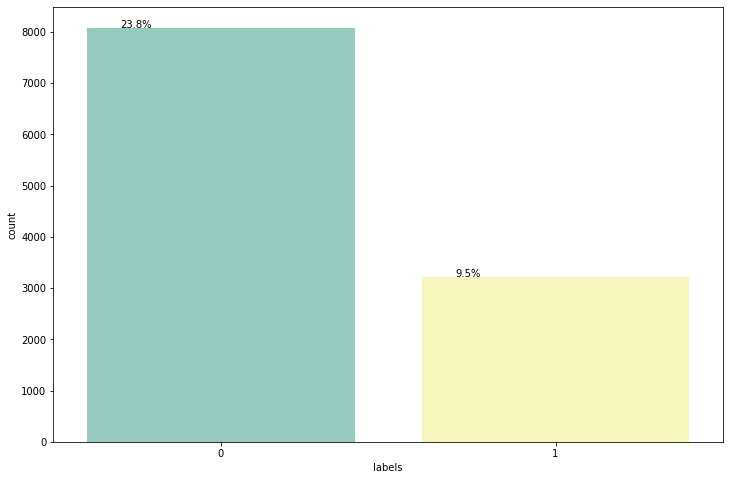

In [ ]:
sub['labels'] = (test_preds > 0.5).astype(int)
ax = sns.countplot(data = sub, x = 'labels', palette = 'Set3')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height() / len(train)), (p.get_x() + 0.1, p.get_height() + 5))

In [ ]:
finish = time()
print(strftime("%H:%M:%S", gmtime(finish - start)))

00:08:13


In [ ]:
train.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

In [ ]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


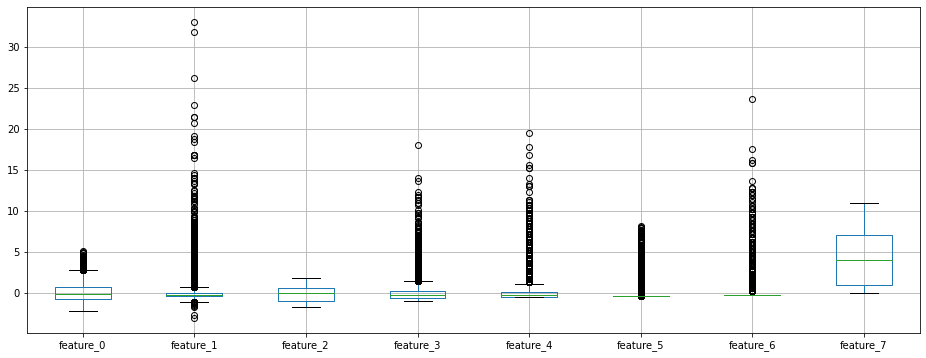

In [ ]:
plt.figure(figsize=(16,6))
train.boxplot(column=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
                       'feature_5', 'feature_6', 'feature_7'])

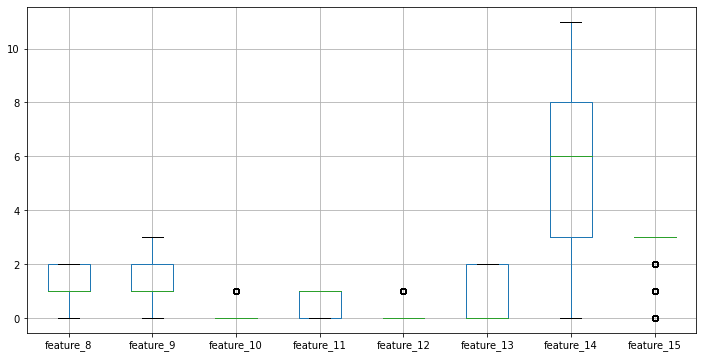

In [ ]:
plt.figure(figsize=(12,6))
train.boxplot(column=['feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 
                                   'feature_13', 'feature_14', 'feature_15'])

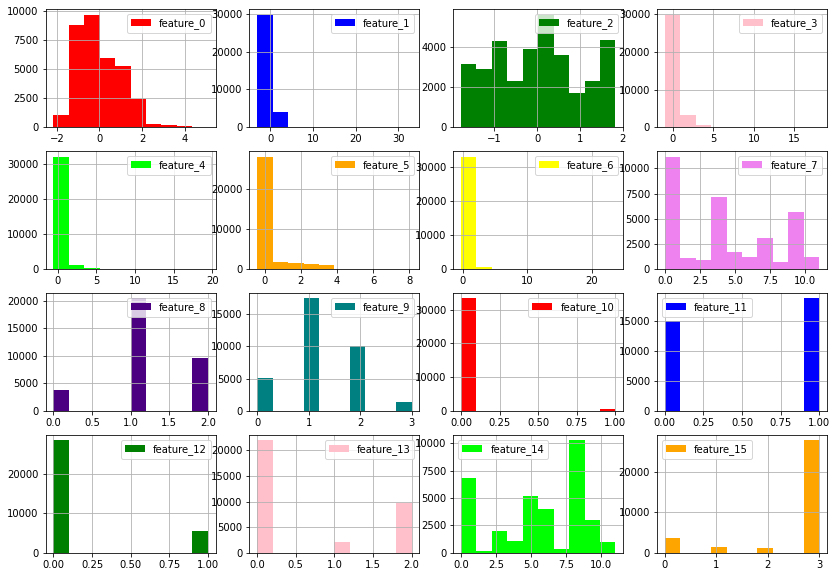

In [ ]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange']
for i,j in zip(range(1,17),train.columns[:-1]):
    plt.subplot(4,4,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()

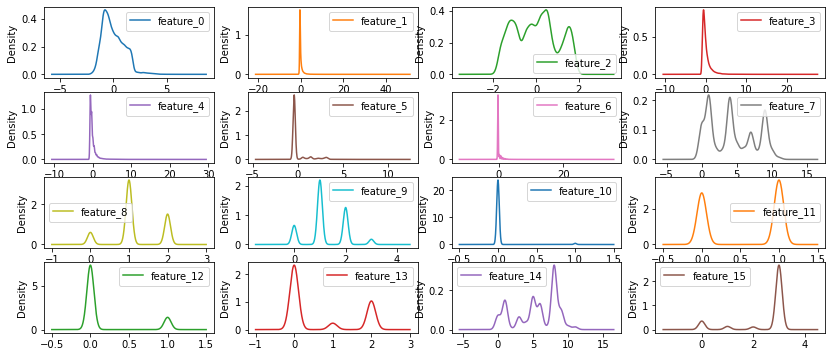

In [ ]:
train[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']].plot(kind='density', subplots=True, 
                                                    layout=(4,4), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

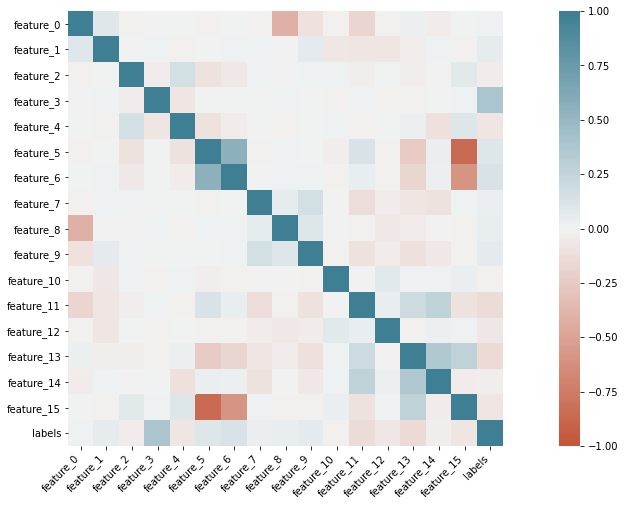

In [ ]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

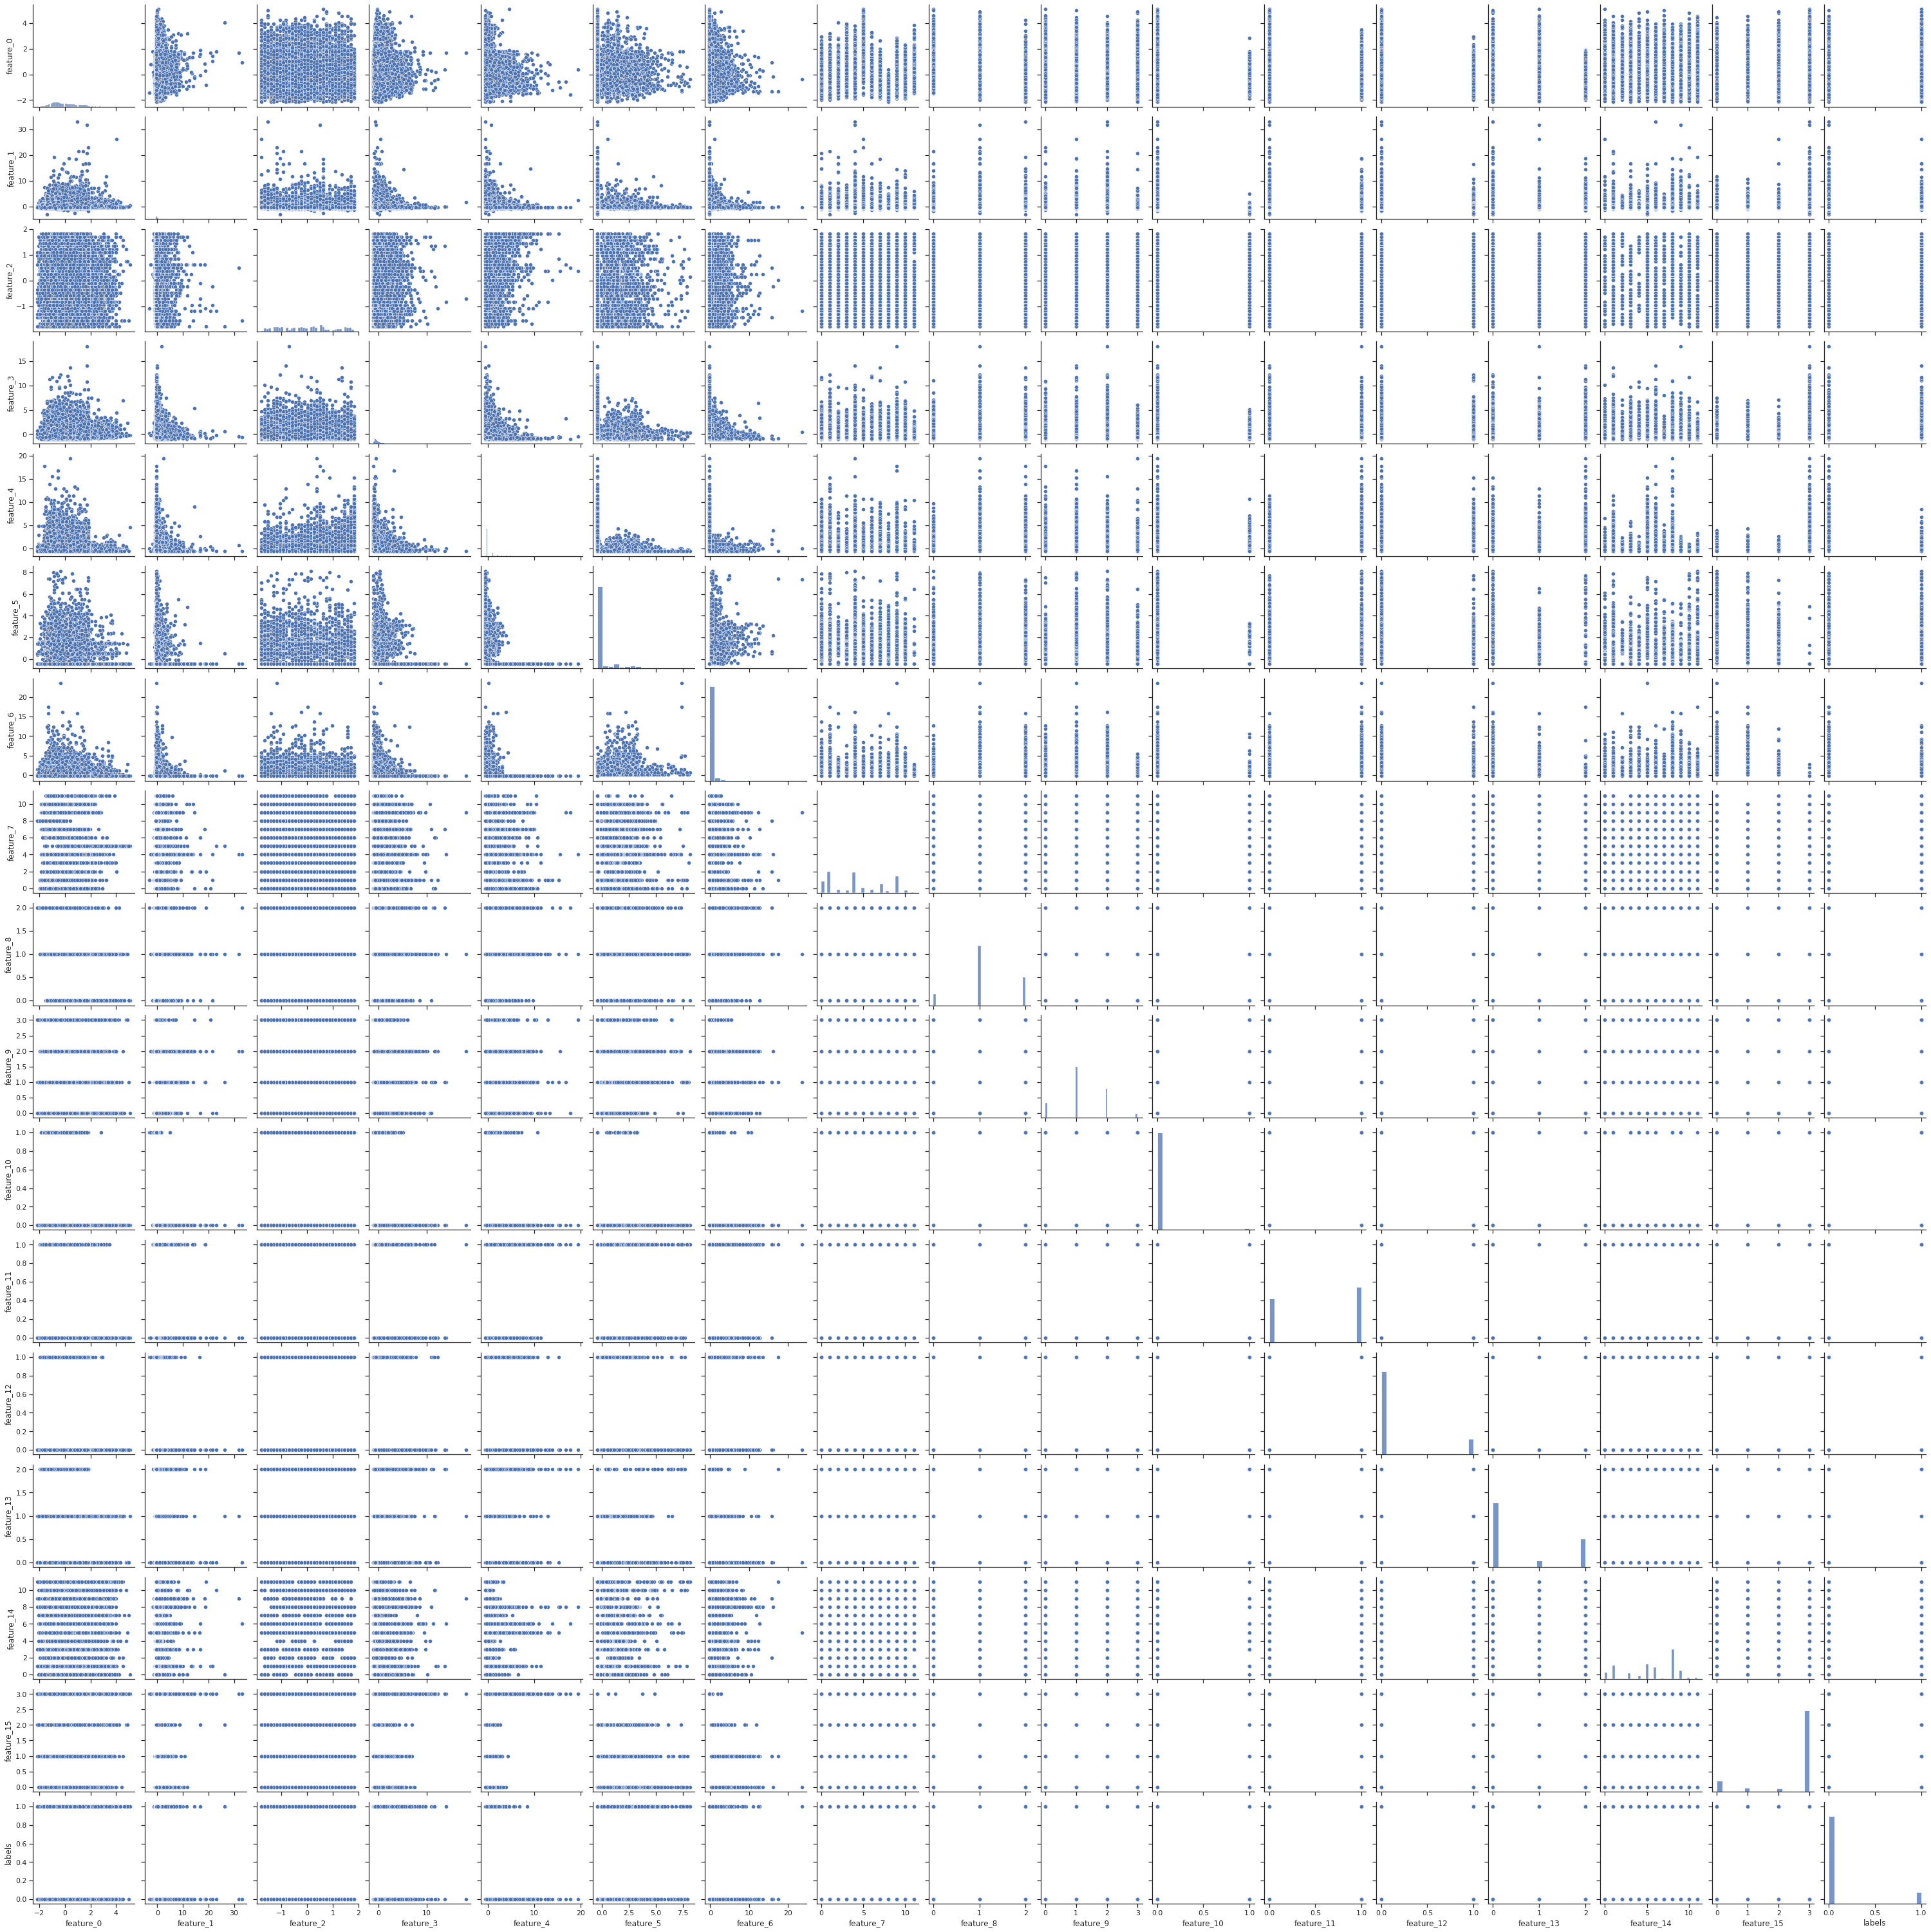

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train)

In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [ ]:
x = train.drop(['labels'], axis=1)
y = train['labels']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)

Num Features: 3
Selected Features: [False False False  True False False False False False False False  True
  True False False False]
Feature Ranking: [10 12 11  1  3  6  5 14  9  8  4  1  1  2 13  7]


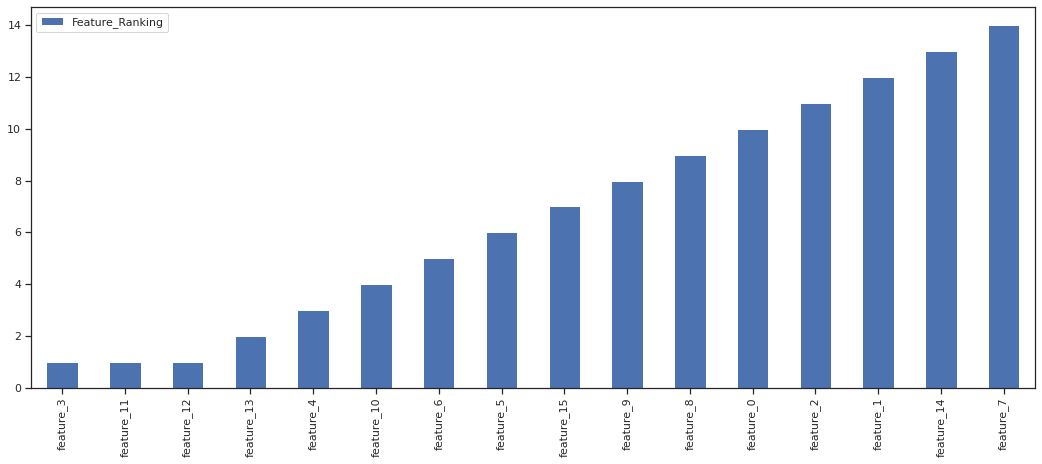

In [ ]:
"df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

import pickle

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

filename = 'Churn_DecisionTree_model.sav'
pickle.dump(model, open(filename, 'wb'))

*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.8894131524624005
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[5732  233]
 [ 517  300]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5965
           1       0.56      0.37      0.44       817

    accuracy                           0.89      6782
   macro avg       0.74      0.66      0.69      6782
weighted avg       0.87      0.89      0.88      6782



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

filename = 'Churn_RandomForest_model.sav'
pickle.dump(model, open(filename, 'wb'))

Accuracy of Random Forest:  0.9060749041580655
Confusion matrix 
 [[5807  158]
 [ 479  338]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5965
           1       0.68      0.41      0.51       817

    accuracy                           0.91      6782
   macro avg       0.80      0.69      0.73      6782
weighted avg       0.89      0.91      0.90      6782



In [ ]:
import xgboost as xgb

xgbmodel=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# Fit on data
best_clf_xgb = xgbmodel.fit(X_train, y_train)

#Predict
predictions = best_clf_xgb.predict(X_test)

#Check Prediction Score
print("Accuracy of XGBoost: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

filename = 'Churn_XGBoost_model.sav'
pickle.dump(xgbmodel, open(filename, 'wb'))

Accuracy of XGBoost:  0.9057800058979653
Confusion matrix 
 [[5766  199]
 [ 440  377]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5965
           1       0.65      0.46      0.54       817

    accuracy                           0.91      6782
   macro avg       0.79      0.71      0.74      6782
weighted avg       0.90      0.91      0.90      6782



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train,y_train))

Iteration 1, loss = 0.31445655
Iteration 2, loss = 0.26156779
Iteration 3, loss = 0.25797435
Iteration 4, loss = 0.25527880
Iteration 5, loss = 0.25019319
Iteration 6, loss = 0.24646315
Iteration 7, loss = 0.24483501
Iteration 8, loss = 0.24226109
Iteration 9, loss = 0.24124172
Iteration 10, loss = 0.24093541
Iteration 11, loss = 0.24045008
Iteration 12, loss = 0.23874223
Iteration 13, loss = 0.23669973
Iteration 14, loss = 0.23678974
Iteration 15, loss = 0.23587007
Iteration 16, loss = 0.23491320
Iteration 17, loss = 0.23539817
Iteration 18, loss = 0.23466859
Iteration 19, loss = 0.23329523
Iteration 20, loss = 0.23362516
Iteration 21, loss = 0.23278707
Iteration 22, loss = 0.23401296
Iteration 23, loss = 0.23308681
Iteration 24, loss = 0.23222365
Iteration 25, loss = 0.23229677
Iteration 26, loss = 0.23264841
Iteration 27, loss = 0.23251840
Iteration 28, loss = 0.23198149
Iteration 29, loss = 0.23173158
Iteration 30, loss = 0.23117188
Iteration 31, loss = 0.23177811
Iteration 32, los

In [ ]:
#Predict
predictions = mlp.predict(X_test)

#Check Prediction Score
print("Accuracy of MLP: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

filename = 'Churn_NeuralNet_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

Accuracy of MLP:  0.8992922441757594
Confusion matrix 
 [[5755  210]
 [ 473  344]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5965
           1       0.62      0.42      0.50       817

    accuracy                           0.90      6782
   macro avg       0.77      0.69      0.72      6782
weighted avg       0.89      0.90      0.89      6782



In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

# Fit on data
best_clf_lgbm = lgbm_c.fit(X_train, y_train)

#Predict
predictions = best_clf_lgbm.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of LGBM: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

filename = 'Churn_LGBMClassifier_model.sav'
pickle.dump(lgbm_c, open(filename, 'wb'))

*******************ACCURACY***************************************************************
Accuracy of LGBM:  0.9009141846063108
Confusion matrix 
 [[5731  234]
 [ 438  379]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5965
           1       0.62      0.46      0.53       817

    accuracy                           0.90      6782
   macro avg       0.77      0.71      0.74      6782
weighted avg       0.89      0.90      0.89      6782



In [ ]:
test_for_prediction = test[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']]

In [ ]:
prediction_from_dt  = best_clf_dt.predict(test_for_prediction)
df_prediction_from_dt = pd.DataFrame({'labels': prediction_from_dt})
df_prediction_from_dt.to_excel("Final_output_prediction_from_dt.xlsx")

prediction_from_rf  = best_clf_rf.predict(test_for_prediction)
df_prediction_from_rf = pd.DataFrame({'labels': prediction_from_rf})
df_prediction_from_rf.to_excel("Final_output_prediction_from_rf.xlsx")

prediction_from_xgb  = best_clf_rf.predict(test_for_prediction)
prediction_from_xgb = pd.DataFrame({'labels': prediction_from_xgb})
prediction_from_xgb.to_excel("Final_output_prediction_from_xgb.xlsx")

In [ ]:
def generate_prediction(model_name, model, test_file):    
    prediction_file_name = "Final_output_prediction_from_" + model_name +".xlsx"
    prediction_from_model  = model.predict(test_file)
    prediction_from_model = pd.DataFrame({'labels': prediction_from_model})
    prediction_from_model.to_excel(prediction_file_name)